## Use case: 
???

## What is it?
 - For classification: ???
   - At each node, the algorithm learns/decides
     - which **feature** is the most useful for classification at that point
     - what **threshold** to use
     - objective: to reduce **impurity** at each node
 - For regression: ???
 

## How?

### (define useful functions)
 - Reference: DSCI_571_sup-learn-1_students/lectures/code/utils.py

In [28]:
#| code-fold: true
import re 
import graphviz

from sklearn.tree import export_graphviz

def display_tree(feature_names, tree, counts=False):
    """ For binary classification only """
    dot = export_graphviz(
        tree,
        out_file=None,
        feature_names=feature_names,
        class_names=tree.classes_.astype(str),
        impurity=False,
    )    
    # adapted from https://stackoverflow.com/questions/44821349/python-graphviz-remove-legend-on-nodes-of-decisiontreeclassifier
    # dot = re.sub('(\\\\nsamples = [0-9]+)(\\\\nvalue = \[[0-9]+, [0-9]+\])(\\\\nclass = [A-Za-z0-9]+)', '', dot)
    if counts: 
        dot = re.sub("(samples = [0-9]+)\\\\n", "", dot)
        dot = re.sub("value", "counts", dot)
    else:
        dot = re.sub("(\\\\nsamples = [0-9]+)(\\\\nvalue = \[[0-9]+, [0-9]+\])", "", dot)
        dot = re.sub("(samples = [0-9]+)(\\\\nvalue = \[[0-9]+, [0-9]+\])\\\\n", "", dot)

    return graphviz.Source(dot)

### Classification

In [4]:
import pandas as pd

# Prepare data
df = pd.read_csv("data/quiz2-grade-toy-classification.csv")
y, X = df.pop("quiz2"), df
X.head()

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1
0,1,1,92,93,84,91,92
1,1,0,94,90,80,83,91
2,0,0,78,85,83,80,80
3,0,1,91,94,92,91,89
4,0,1,77,83,90,92,85


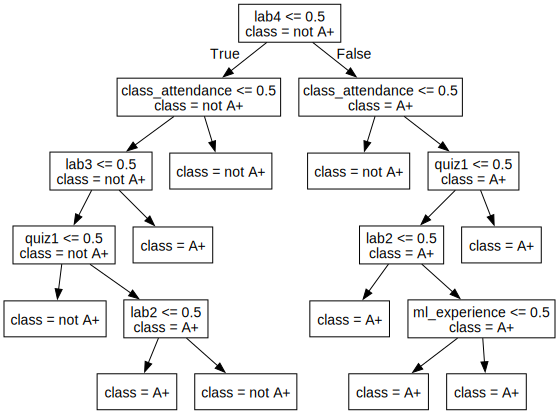

In [36]:
import numpy as np
X_binary = X.copy()
X_binary.loc[:,"lab1":"quiz1"] = X_binary.loc[:,"lab1":"quiz1"].apply(lambda x: np.where(x >= 90, 1, 0))

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_binary, y)
clf.predict(X_binary)

clf.score(X_binary, y) # accuracy

display_tree(X_binary.columns, clf)

In [37]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X, y)
clf.predict(X)

array(['A+', 'not A+', 'not A+', 'A+', 'A+', 'not A+', 'A+', 'not A+',
       'not A+', 'not A+', 'A+', 'A+', 'A+', 'A+', 'not A+', 'not A+',
       'A+', 'not A+', 'not A+', 'not A+', 'A+'], dtype=object)

In [38]:
clf.score(X, y) # accuracy

1.0

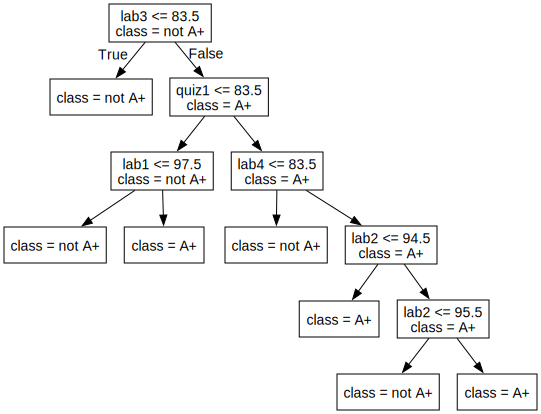

In [40]:
display_tree(X.columns, clf)

### Regression

In [37]:
import pandas as pd

# Prepare data
df = pd.read_csv("data/quiz2-grade-toy-regression.csv")
y, X = df.pop("quiz2"), df
X.head()

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1
0,1,1,92,93,84,91,92
1,1,0,94,90,80,83,91
2,0,0,78,85,83,80,80
3,0,1,91,94,92,91,89
4,0,1,77,83,90,92,85


In [39]:
from sklearn.tree import DecisionTreeRegressor

reg = DummyRegressor(strategy="mean")
reg.fit(X, y)
reg.predict(X)

array([86.28571429, 86.28571429, 86.28571429, 86.28571429, 86.28571429,
       86.28571429, 86.28571429])

In [40]:
reg.score(X, y) # R^2

0.0

## Hyperparameters
 - `criterion` - impurity
   - (`DecisionTreeClassifier`) Default: "gini"
     - "gini": gini index
     - "entropy": cross entropy
     - "log_loss": information gain
   - (`DecisionTreeRegressor`) Default: "squared_error"
     - {"squared_error", "friedman_mse", "absolute_error", "poisson"}
 - 

## Pros 

## Cons

## Remarks

In [43]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth o

In [44]:
?DecisionTreeRegressor

Init signature:
DecisionTreeRegressor(
    *,
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 loss usi